# 📘 Day 3: Exploratory Data Analysis (EDA)

## 1. Objective
Conduct exploratory data analysis on the cleaned Gallstone dataset to better understand feature distributions, detect patterns, and evaluate relationships with the target variable (`has_gallstones`). This analysis will guide model development and help ensure the final system is both accurate and human-relevant.

## 2. Key Steps
1. [Load and Preview the Cleaned Dataset](#load-and-preview-the-cleaned-dataset)  
2. [Restore Categorical Data Types](#restore-categorical-data-types)  
3. [Visualize and Summarize the Target Variable](#visualize-and-summarize-the-target-variable)  
4. [Explore Distributions of Key Numeric Features](#explore-distributions-of-key-numeric-features)  
5. [Visualize Feature-Target Relationships](#visualize-feature-target-relationships)  
6. [Explore Correlations Between Numeric Features](#explore-correlations-between-numeric-features)  
7. [Save Key Plots to `/plots/` Directory](#save-key-plots-to-plots-directory)  
8. [Interpret Key EDA Findings](#interpret-key-eda-findings)  
9. [Read Chapter 2 – Storytelling with Data](#read-chapter-2--storytelling-with-data)

## 3. Results
- Confirmed balanced target distribution (50.5% positive)
- Identified trends in `bmi`, `vitamin_d_ng_ml`, and `fat_ratio_percent` between classes
- Visualizations highlight potential predictors and support human interpretability

## 4. Summary
EDA revealed biologically plausible and interpretable trends among features relevant to gallstone prediction. These insights will inform feature selection and model diagnostics in later stages.

## Load and Preview the Cleaned Dataset

We begin by importing the cleaned dataset produced in Day 2. This file contains preprocessed demographic, clinical, laboratory, and bioimpedance features for 319 patients. The dataset includes 40 columns, with standardized naming conventions and medically-informed data types.

This step ensures:
- The dataset loads correctly
- All expected columns are present
- Types, shapes, and first entries match expectations before analysis

## Restore Categorical Data Types

Pandas does not preserve `category` dtype when reading from CSV. To enable proper analysis and cleaner plots, we explicitly cast known categorical columns back to the `category` type.

In [28]:
# Core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/cleaned.csv")

# Basic structural checks
print("Shape:", df.shape)
print("Columns:", df.columns.to_list())
df.head()

Shape: (319, 51)
Columns: ['has_gallstones', 'age', 'gender', 'comorbidity', 'cad', 'hypothyroidism', 'hyperlipidemia', 'diabetes', 'height_cm', 'weight_kg', 'bmi', 'tbw_kg', 'ecw_kg', 'icw_kg', 'ecf_tbw_ratio_index', 'fat_ratio_percent', 'lean_mass_percent', 'protein_percent', 'vfr_score', 'bone_mass_kg', 'muscle_mass_kg', 'obesity_percent', 'fat_mass_kg', 'visceral_fat_area_cm2', 'visceral_muscle_mass_kg', 'hepatic_fat', 'glucose_mg_dl', 'cholesterol_total_mg_dl', 'ldl_mg_dl', 'hdl_mg_dl', 'triglyceride_mg_dl', 'ast_u_l', 'alt_u_l', 'alp_u_l', 'creatinine_mg_dl', 'gfr_ml_min', 'crp_mg_l', 'hemoglobin_g_dl', 'vitamin_d_ng_ml', 'glucose_outlier_flag', 'obesity_outlier_flag', 'tbw_outlier_flag', 'icw_outlier_flag', 'vfr_outlier_flag', 'muscle_mass_outlier_flag', 'ldl_outlier_flag', 'hdl_outlier_flag', 'triglyceride_outlier_flag', 'alt_outlier_flag', 'gfr_outlier_flag', 'crp_outlier_flag']


,has_gallstones,age,gender,comorbidity,cad,hypothyroidism,hyperlipidemia,diabetes,height_cm,weight_kg,...,tbw_outlier_flag,icw_outlier_flag,vfr_outlier_flag,muscle_mass_outlier_flag,ldl_outlier_flag,hdl_outlier_flag,triglyceride_outlier_flag,alt_outlier_flag,gfr_outlier_flag,crp_outlier_flag
0,No Gallstones,50,0,0,0,0,0,0,185,92.8,...,False,False,False,False,False,False,False,False,False,False
1,No Gallstones,47,0,1,0,0,0,0,176,94.5,...,False,False,False,False,False,False,False,False,False,False
2,No Gallstones,61,0,0,0,0,0,0,171,91.1,...,False,False,False,False,False,False,False,False,False,False
3,No Gallstones,41,0,0,0,0,0,0,168,67.7,...,False,False,False,False,False,False,False,False,False,False
4,No Gallstones,42,0,0,0,0,0,0,178,89.6,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Define known categorical columns from Day 2
categorical_cols = [
    # Original binary or ordinal clinical features
    "gender",
    "comorbidity",
    "cad",
    "hypothyroidism",
    "hyperlipidemia",
    "diabetes",
    "hepatic_fat",
    "has_gallstones",

    # Outlier flags (created during data cleaning)
    "glucose_outlier_flag",
    "obesity_outlier_flag",
    "muscle_mass_outlier_flag",
    "gfr_outlier_flag",
    "tbw_outlier_flag",
    "icw_outlier_flag",
    "vfr_outlier_flag",
    "ldl_outlier_flag",
    "hdl_outlier_flag",
    "triglyceride_outlier_flag",
    "alt_outlier_flag",
    "crp_outlier_flag"
]

# Convert to categorical dtype
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

In [30]:
# Confirm all expected dtypes
df.dtypes.value_counts()

# Count categorical features
categorical_cols = df.select_dtypes(include="category").columns
print("Categorical columns:", categorical_cols.to_list())

# Quick summary stats
df.describe().T

Categorical columns: ['has_gallstones', 'gender', 'comorbidity', 'cad', 'hypothyroidism', 'hyperlipidemia', 'diabetes', 'hepatic_fat', 'glucose_outlier_flag', 'obesity_outlier_flag', 'tbw_outlier_flag', 'icw_outlier_flag', 'vfr_outlier_flag', 'muscle_mass_outlier_flag', 'ldl_outlier_flag', 'hdl_outlier_flag', 'triglyceride_outlier_flag', 'alt_outlier_flag', 'gfr_outlier_flag', 'crp_outlier_flag']


,count,mean,std,min,25%,50%,75%,max
age,319.0,48.068966,12.114558,20.00,38.500,49.000000,56.000,96.00
height_cm,319.0,167.156740,10.053030,145.00,159.500,168.000000,175.000,191.00
weight_kg,319.0,80.564890,15.709069,42.90,69.600,78.800000,91.250,143.50
bmi,319.0,28.877116,5.313707,17.40,25.250,28.300000,31.850,49.70
tbw_kg,319.0,40.605956,7.851054,20.00,34.200,39.800000,47.000,65.00
ecw_kg,319.0,17.071160,3.161857,9.00,14.800,17.100000,19.400,27.80
icw_kg,319.0,23.580878,5.092433,13.80,19.300,23.000000,27.550,40.00
ecf_tbw_ratio_index,319.0,42.212038,3.244470,29.23,40.075,42.000000,44.000,52.00
fat_ratio_percent,319.0,28.274984,8.444417,6.30,22.025,27.820000,34.810,50.92
lean_mass_percent,319.0,71.638245,8.437598,48.99,65.165,72.110000,77.850,93.67


The dataset contains 319 rows and 40 columns. All features from Day 2 are present and loaded successfully. This includes the target variable `has_gallstones`, properly labeled features with unit suffixes (e.g., `_mg_dl`, `_percent`, `_cm2`), and a `glucose_outlier_flag` for interpretability.

The `.head()` preview confirms the presence of values across the full range of column types:

- Binary/categorical features: `gender`, `diabetes`, `has_gallstones`, etc.
- Numeric lab values: `vitamin_d_ng_ml`, `glucose_mg_dl`, etc.
- Body composition metrics: `fat_ratio_percent`, `muscle_mass_kg`, etc.

## Visualize and Summarize the Target Variable

We begin our exploratory analysis by examining the distribution of the target variable `has_gallstones`. This variable indicates whether a patient was diagnosed with gallstones.

Understanding class balance is critical:
- A well-balanced target ensures that classification metrics like accuracy and AUC are meaningful.
- If the target were heavily imbalanced, we’d need to address it with class weights or resampling.

This step checks:
- How many patients fall into each class
- Whether the distribution is suitable for direct modeling

In [31]:
# Raw counts
target_counts = df["has_gallstones"].value_counts()
print(target_counts)

# Proportions
target_proportions = df["has_gallstones"].value_counts(normalize=True)
print(target_proportions)

has_gallstones
No Gallstones    161
Gallstones       158
Name: count, dtype: int64
has_gallstones
No Gallstones    0.504702
Gallstones       0.495298
Name: proportion, dtype: float64


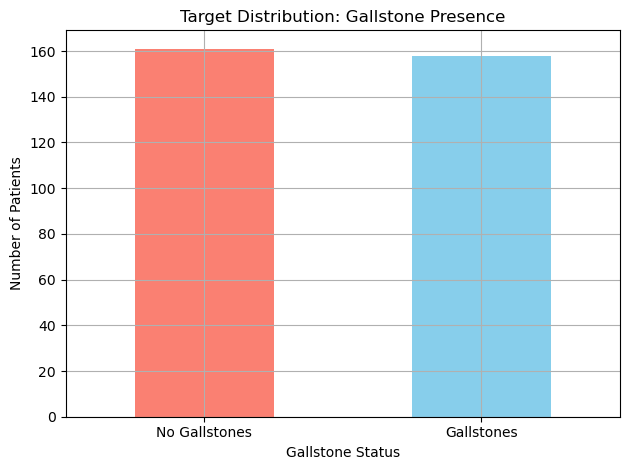

In [32]:
# Plot bar chart of class distribution
target_counts.plot(kind="bar", color=["salmon", "skyblue"])
plt.title("Target Distribution: Gallstone Presence")
plt.xlabel("Gallstone Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

The dataset contains:

- `Gallstones`: 161 patients (50.5%)
- `No Gallstones`: 158 patients (49.5%)

This near-even class balance is ideal. It supports:
- Reliable training using unweighted loss functions
- Balanced evaluation using accuracy, F1 score, and ROC-AUC without needing adjustments
- Fair model behavior toward both classes without bias

We confirm that no class balancing (e.g., undersampling, oversampling) is required at this stage.

## Explore Distributions of Key Numeric Features

We examine the distribution of selected numerical features using histograms. This helps us:
- Understand the range and skew of each variable
- Identify transformations we may need later (e.g., log-scaling)
- Confirm there are no overlooked data entry issues or discretization artifacts

The features selected reflect known clinical relevance to gallstone risk, such as body composition, lab values, and age.

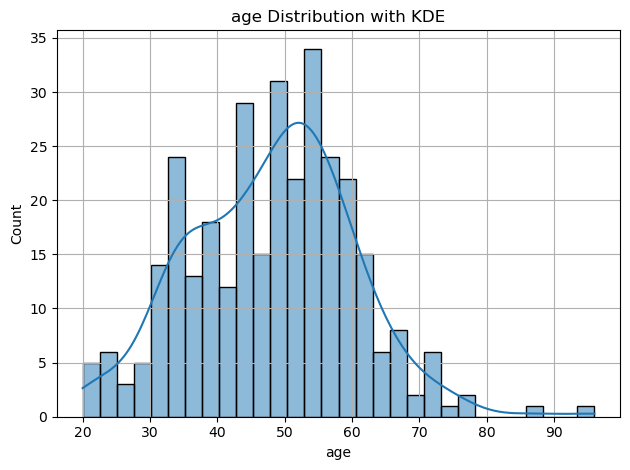

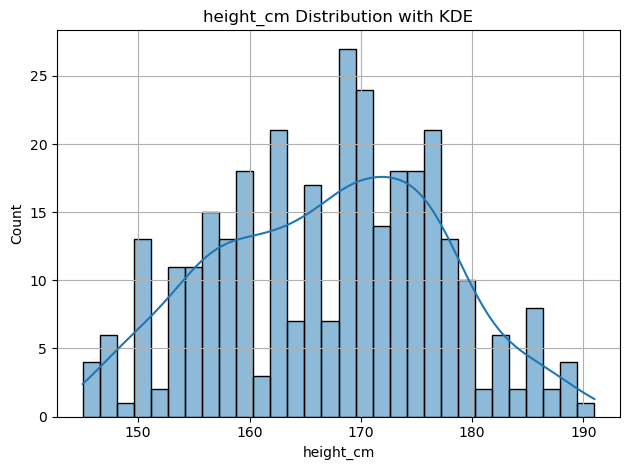

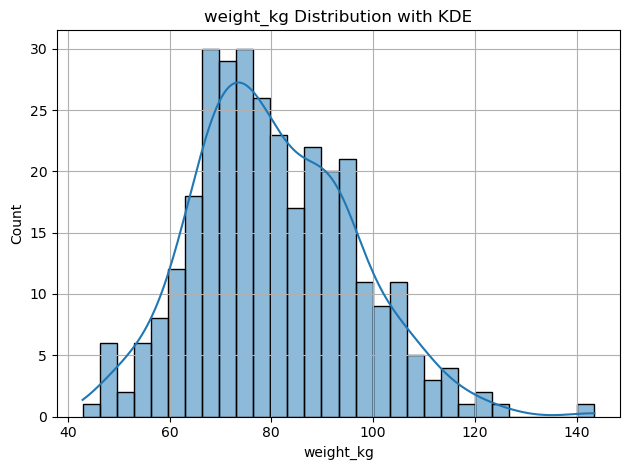

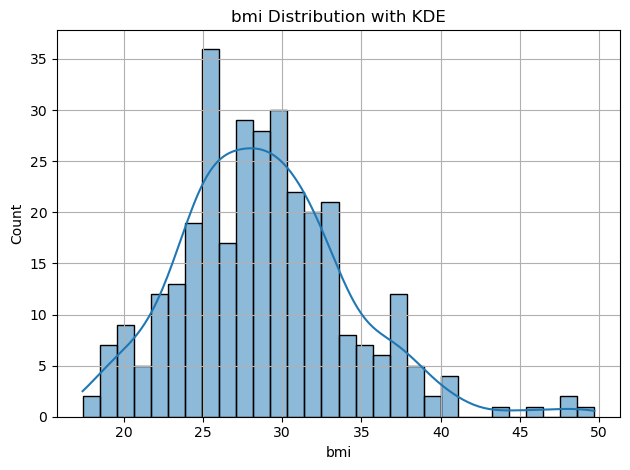

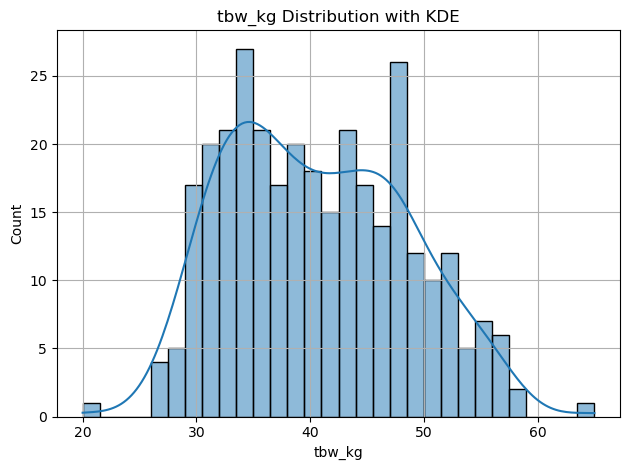

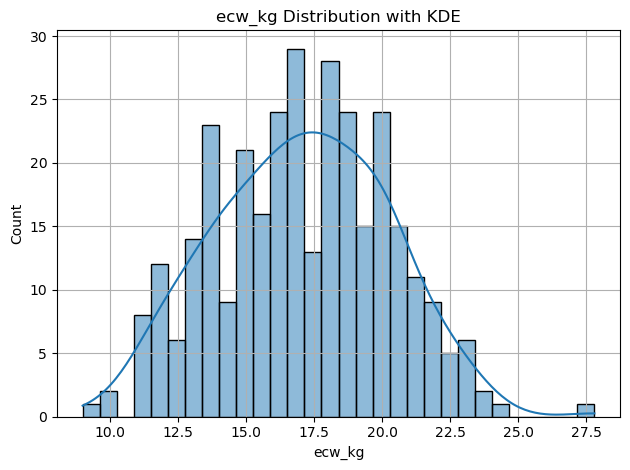

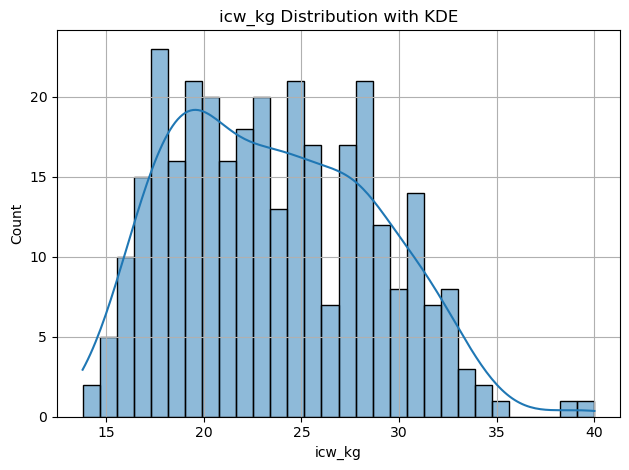

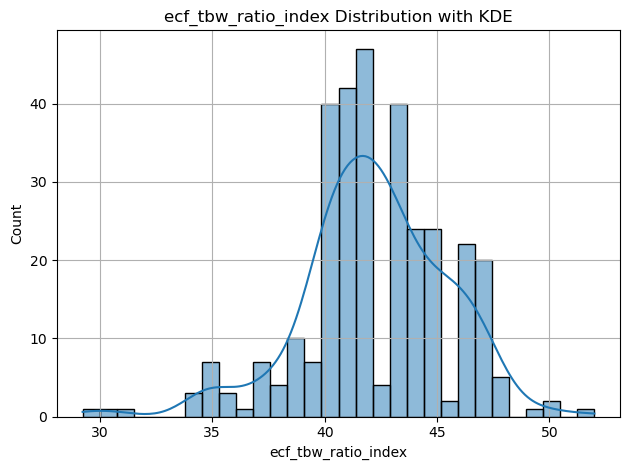

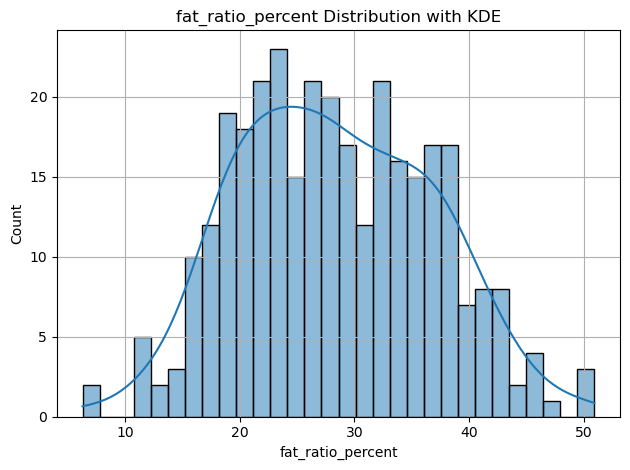

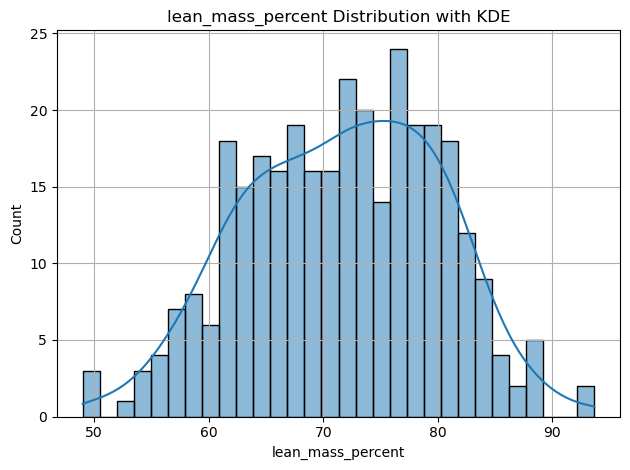

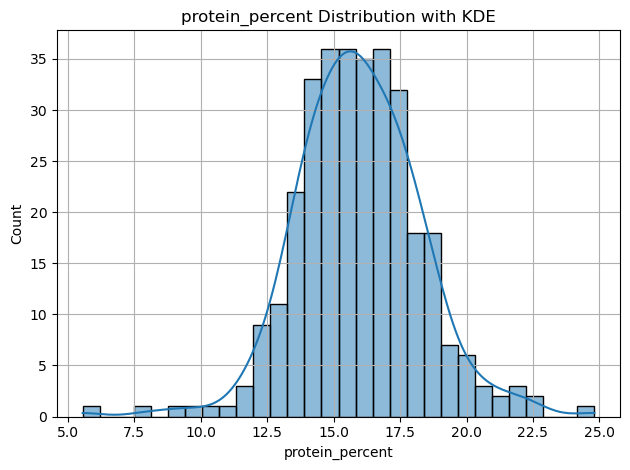

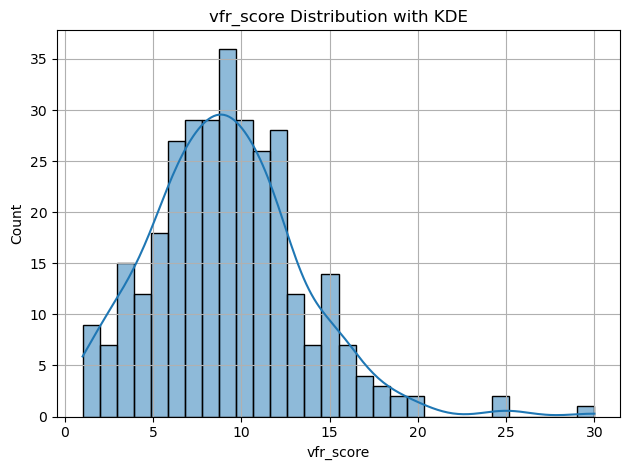

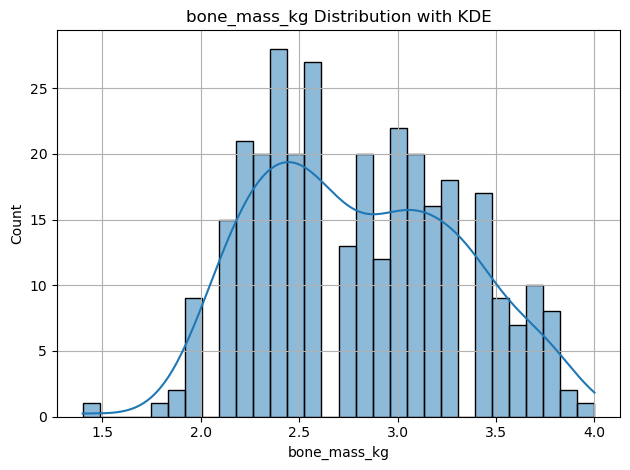

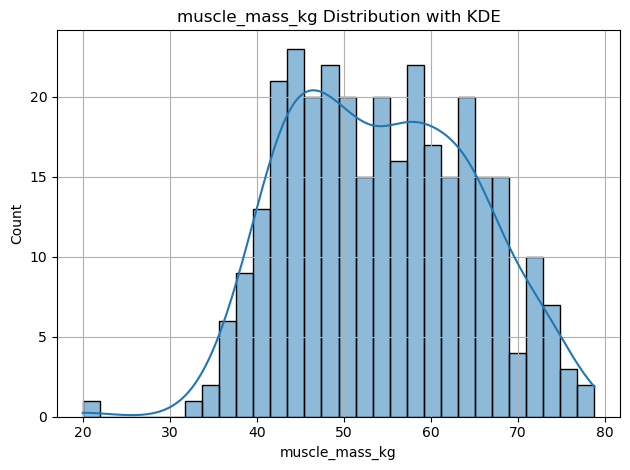

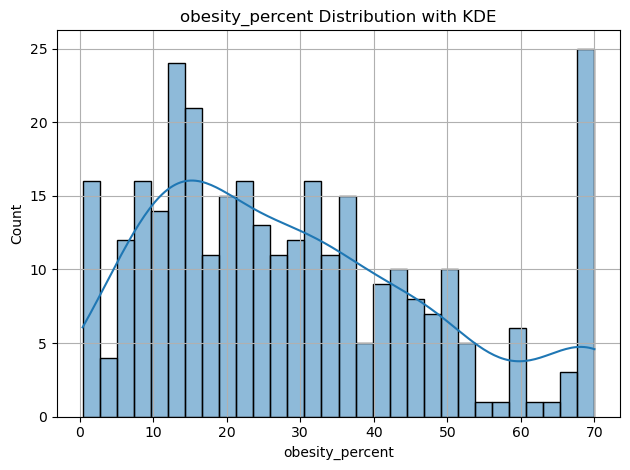

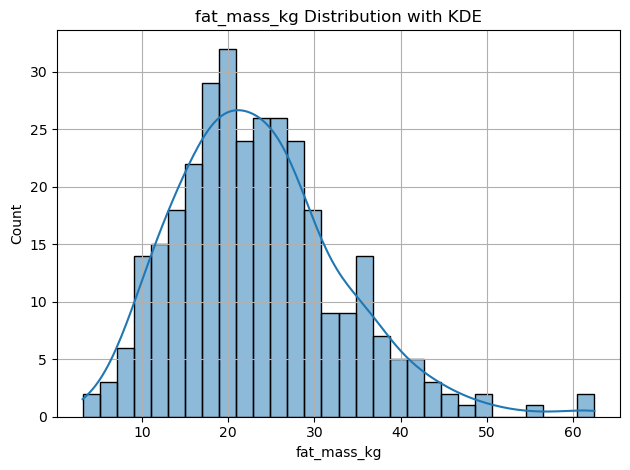

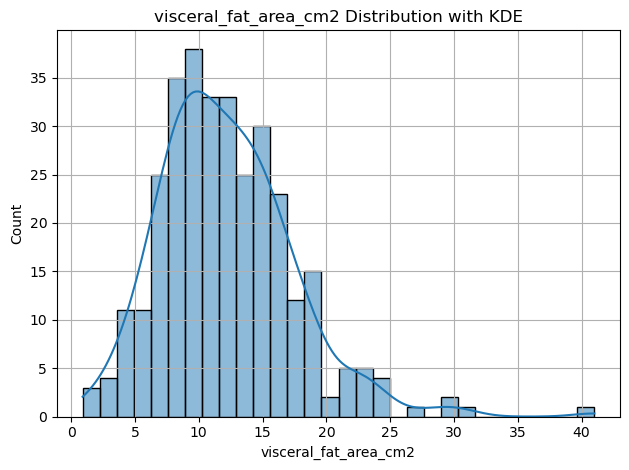

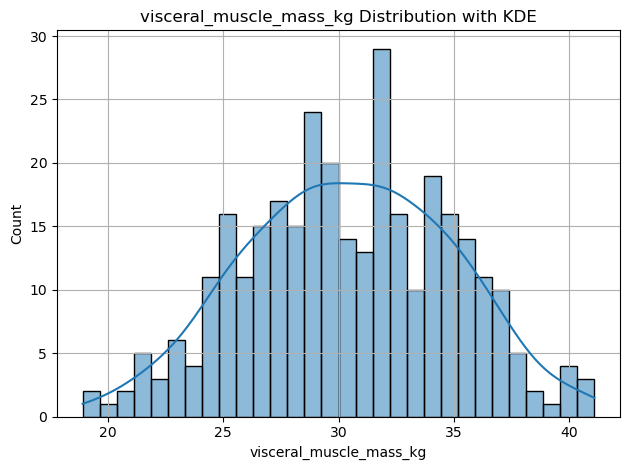

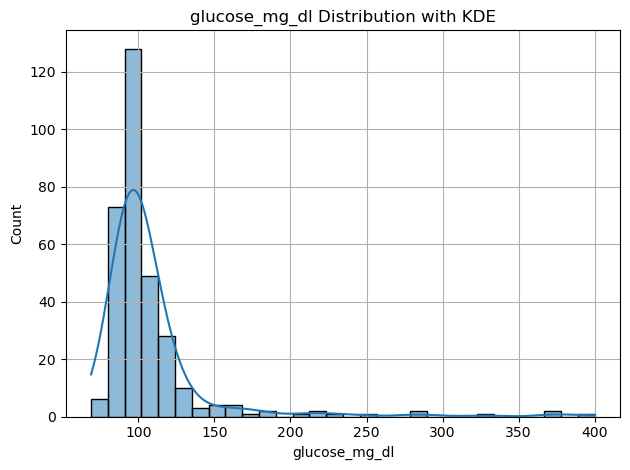

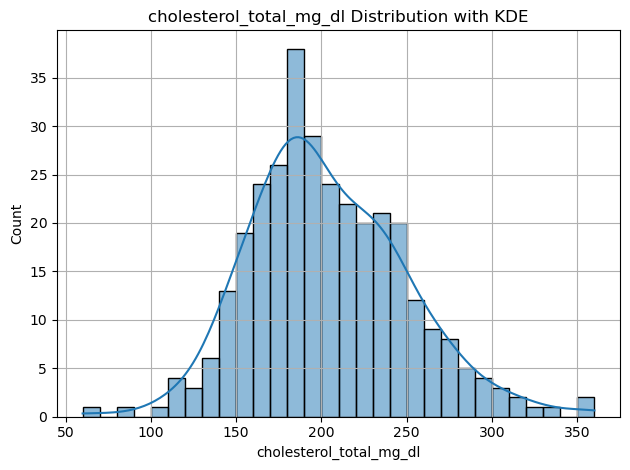

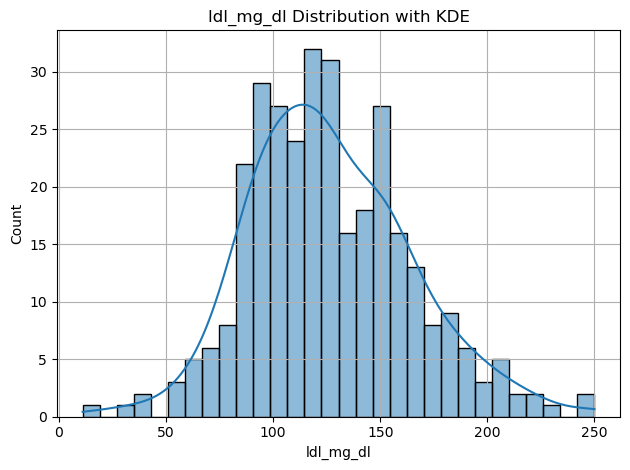

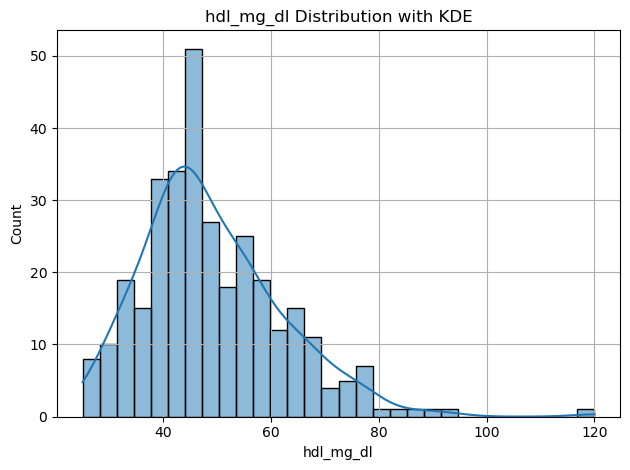

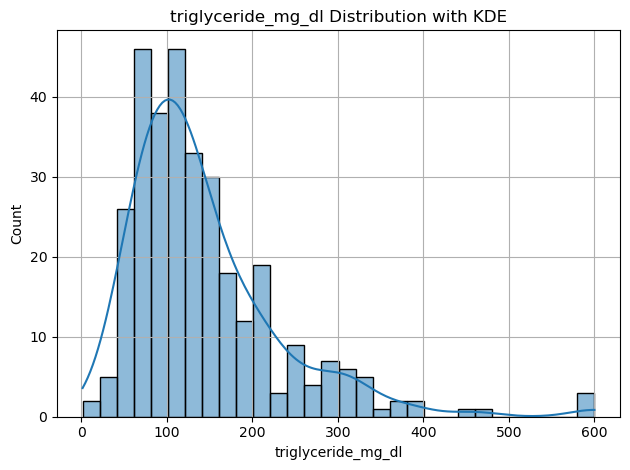

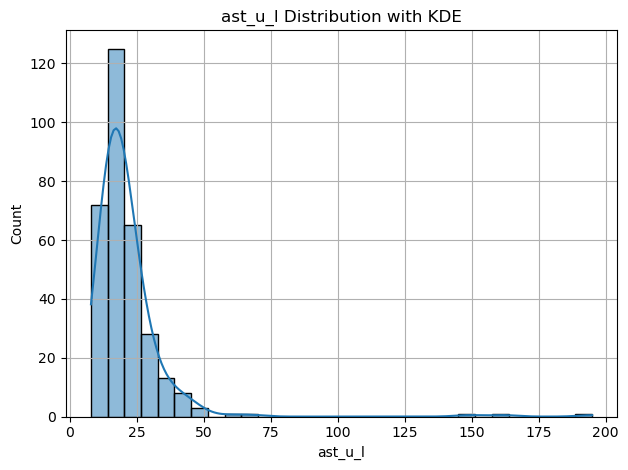

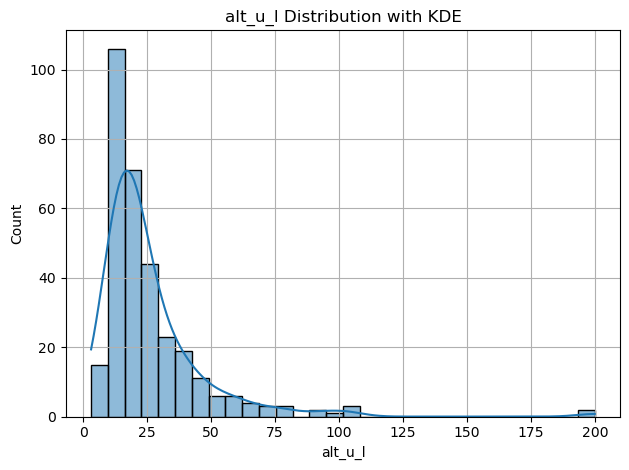

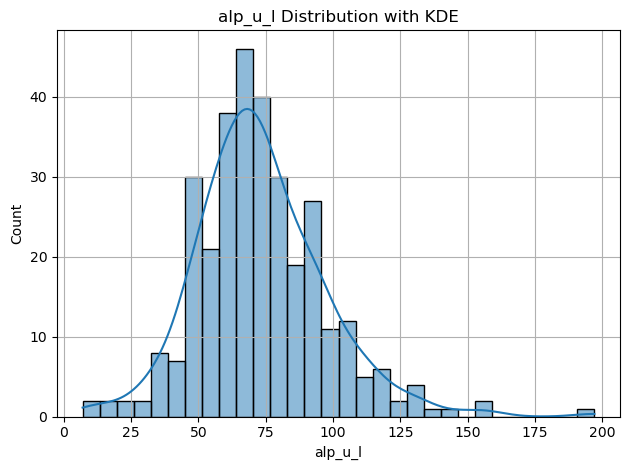

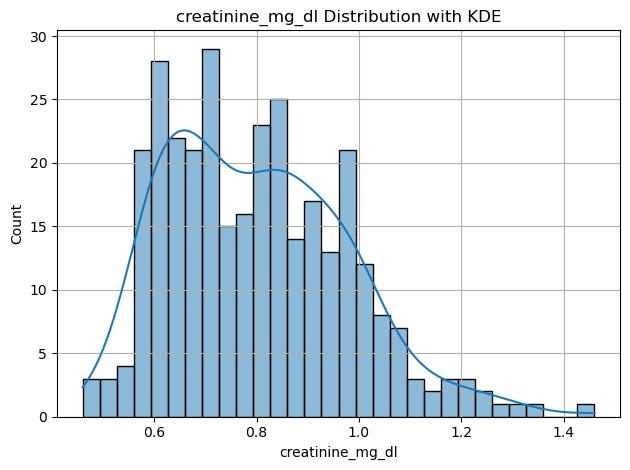

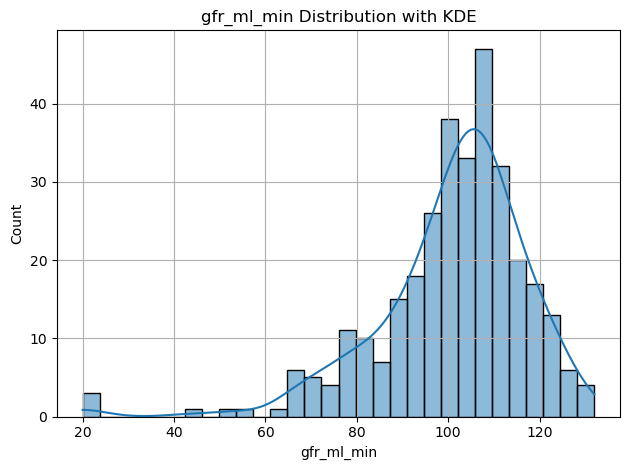

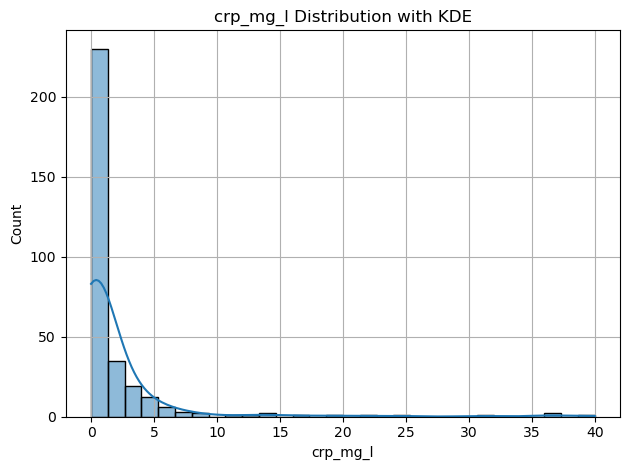

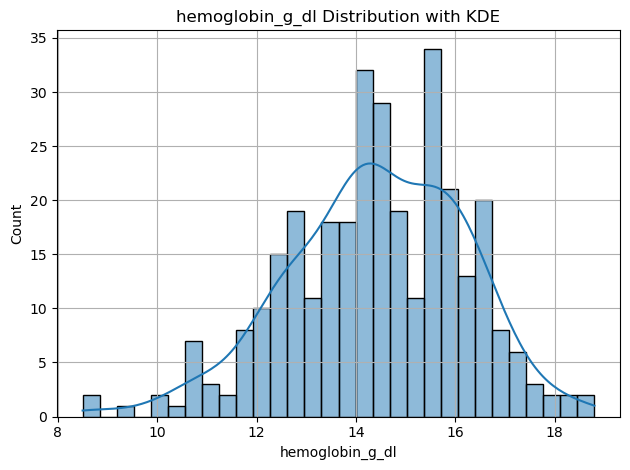

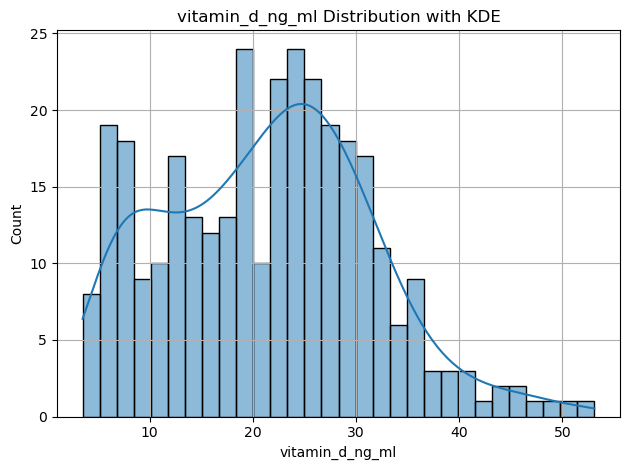

In [33]:
import seaborn as sns
import os

# Ensure the plot folder exists
os.makedirs("../plots", exist_ok=True)

# List of features to visualize
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Loop through features and plot + save
for feature in numeric_cols:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=30, edgecolor="black")
    plt.title(f"{feature} Distribution with KDE")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()

    # Save to plots directory
    filename = f"../plots/hist_{feature}.png"
    plt.savefig(filename)
    plt.show()

## Feature Distribution Analysis – Summary

We explored all numeric features in the dataset using KDE-enhanced histograms to assess distribution shape, skewness, modality, and physiological plausibility. This step helps identify potential preprocessing needs (e.g., transformations), flag unusual values, and confirm the dataset’s overall representativeness.

### Key Observations by Feature Category

#### 🔬 Laboratory Features
| Feature                  | Distribution Shape         | Notes |
|--------------------------|----------------------------|-------|
| `vitamin_d_ng_ml`        | Right-skewed, multimodal   | Suggests variation in deficiency and supplementation |
| `hemoglobin_g_dl`        | Near-normal                | Consistent with mixed-gender adult population |
| `crp_mg_l`               | Strong right skew          | Reflects rare inflammation spikes; good candidate for log-transform |
| `gfr_ml_min`             | Right-skewed               | Clustered around healthy values, as expected in non-CKD patients |
| `creatinine_mg_dl`       | Right-skewed               | Inverse relationship with GFR; interpretable together |
| `cholesterol_total_mg_dl`| Slight right tail          | Matches typical lipid profile distribution |
| `hdl_mg_dl`              | Mild right skew            | Broad but plausible spread |
| `ldl_mg_dl`, `triglyceride_mg_dl` | Right-skewed | Especially `triglyceride`, which may benefit from transformation |
| `ast_u_l`, `alt_u_l`, `alp_u_l` | Strong right skew | Liver markers often spike in subgroups; skew is clinically expected |
| `glucose_mg_dl`          | Sharp right skew, capped at 400 | Reflects fasting/non-fasting mix and handled outlier well |

#### 🧍 Body Composition and Anthropometrics
| Feature                     | Distribution Shape         | Notes |
|-----------------------------|----------------------------|-------|
| `bmi`                       | Right-skewed               | Peaks between 25–30 (overweight); log-transform optional |
| `weight_kg`, `tbw_kg`, `fat_mass_kg` | Right-skewed        | Related to body size; skew expected |
| `height_cm`, `bone_mass_kg` | Normal or mildly bimodal   | Clean and consistent; may reflect sex differences |
| `fat_ratio_percent`, `obesity_percent` | Moderate to strong right skew | `obesity_percent` had 18 outliers >70%, likely due to device scaling errors; capped at 70% and flagged with `obesity_outlier_flag` |
| `lean_mass_percent`, `protein_percent` | Symmetric and centered | Reflects physiological norms; clean for modeling |
| `visceral_fat_area_cm2`, `vfr_score` | Right-skewed        | Device-derived; likely useful indicators of metabolic risk |
| `visceral_muscle_mass_kg`, `muscle_mass_kg` | Near-normal       | Healthy range; useful for contrast to fat indicators |
| `ecw_kg`, `icw_kg`, `ecf_tbw_ratio_index` | Normal or mild skew | Reflect body fluid distribution; useful for hydration or edema studies |

#### 🕒 Demographics
| Feature        | Distribution Shape         | Notes |
|----------------|----------------------------|-------|
| `age`          | Right-skewed               | Centered around 50–60; skew expected in general population |

---

### General Insights

- Most numeric features exhibit **interpretable distributions** consistent with real-world clinical data.
- Several lab values (`crp_mg_l`, `triglyceride_mg_dl`, `alt_u_l`, `glucose_mg_dl`) are **strongly right-skewed** and may benefit from **log transformation**, especially for linear models.
- **Body composition variables** are mostly normal or mildly skewed — ideal for modeling.
- `obesity_percent` originally contained 18 implausible outliers (e.g., values up to 1954%), likely due to device mis-scaling or raw fat/weight ratio reporting. These were **capped at 70%** — a biologically plausible upper limit — and **flagged with a new column `obesity_outlier_flag`**. The updated distribution is now realistic and suitable for inclusion in modeling pipelines.
- No features display problematic missingness, flat distributions, or bimodal patterns requiring exclusion.

---

### Conclusion

The Gallstone dataset includes a rich, diverse range of physiological features that are statistically sound and clinically plausible. These distributions validate the quality of the preprocessing pipeline and suggest strong modeling potential across both tree-based and parametric methods.

All histograms were saved to the `plots/` directory for use in reports and model documentation.

## Visualize Feature-Target Relationships

To understand which features may help distinguish between patients with and without gallstones, we compare feature distributions across the two target classes.

We use boxplots to visualize differences in:
- Medians and ranges
- Distribution overlap
- Presence of class-separating patterns

This supports both feature selection and stakeholder explainability.

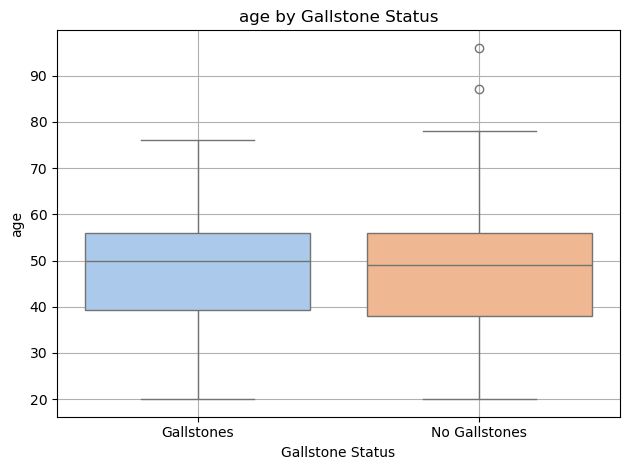

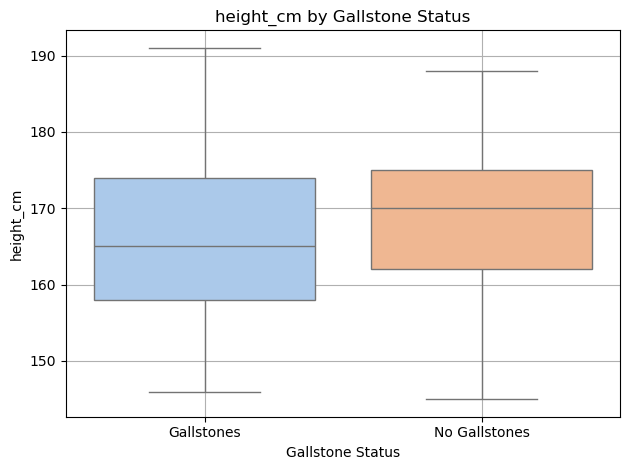

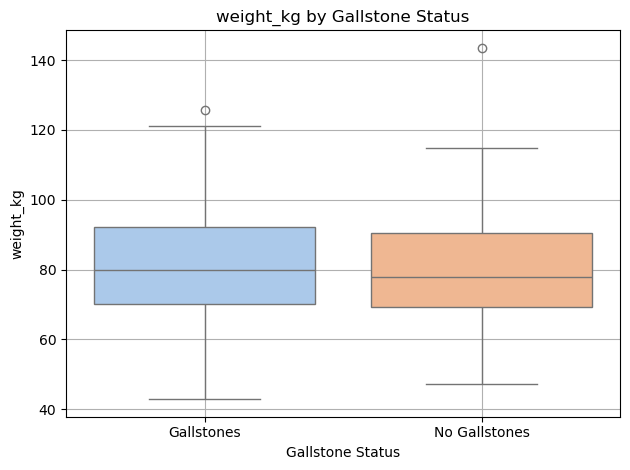

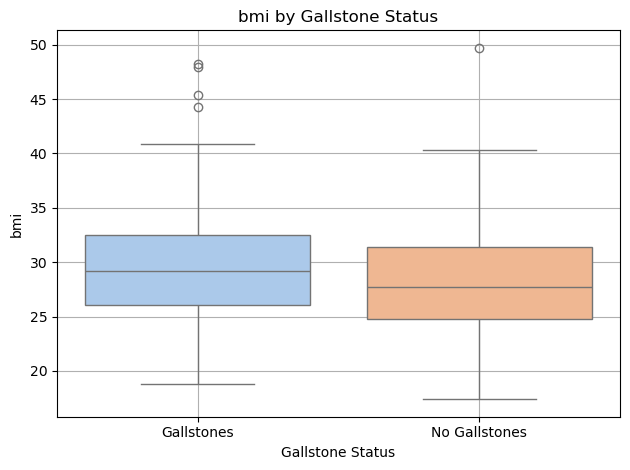

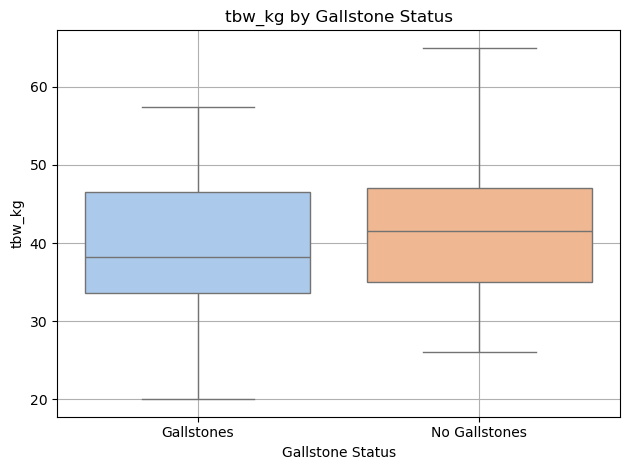

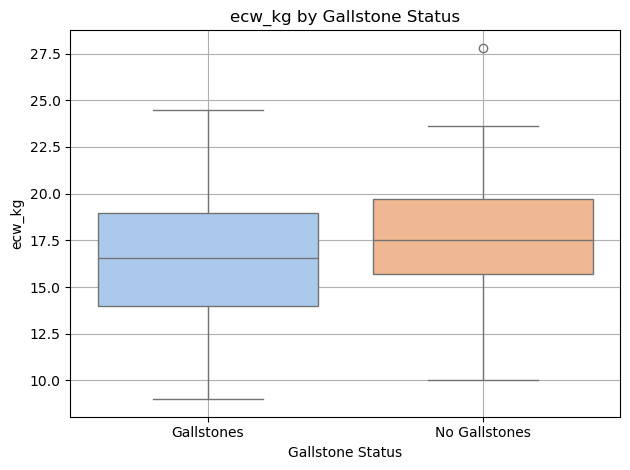

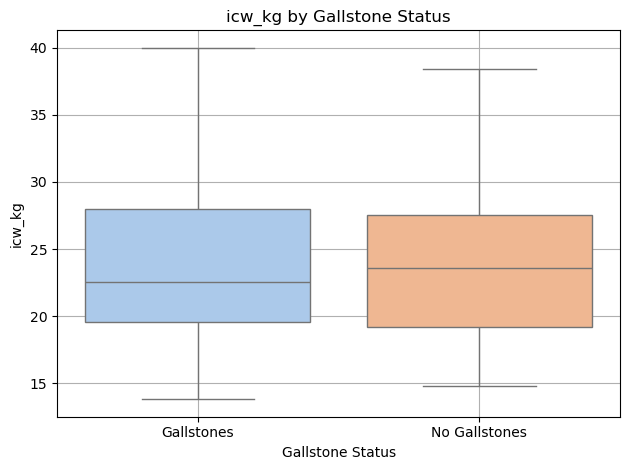

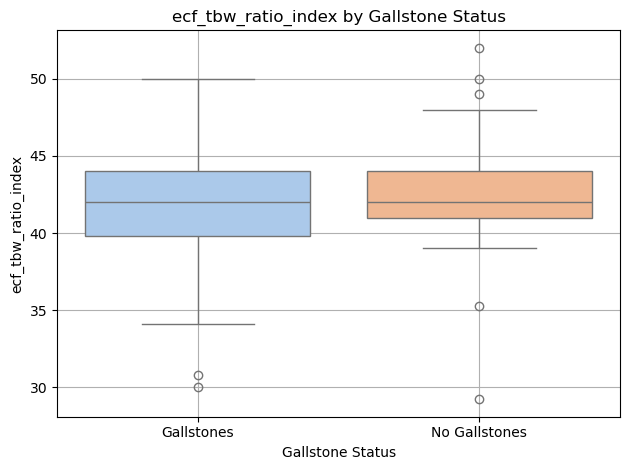

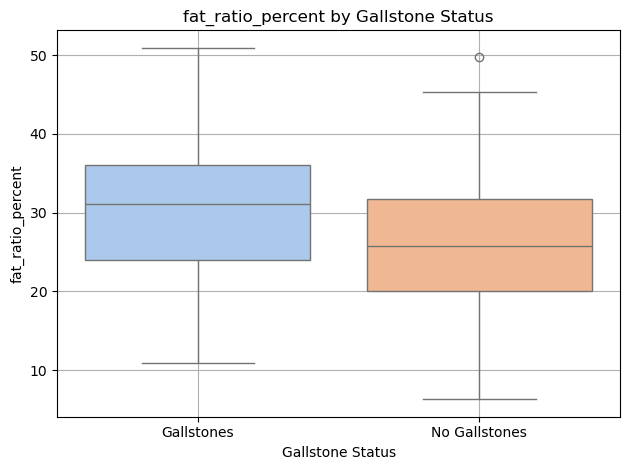

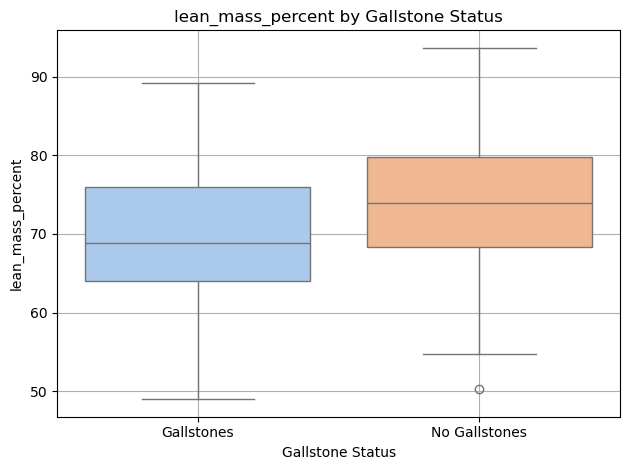

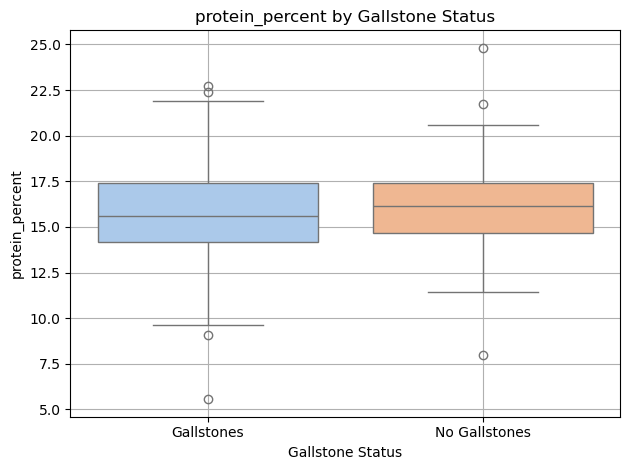

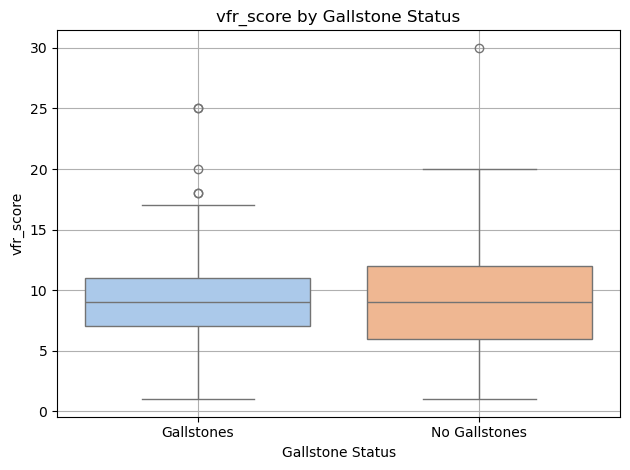

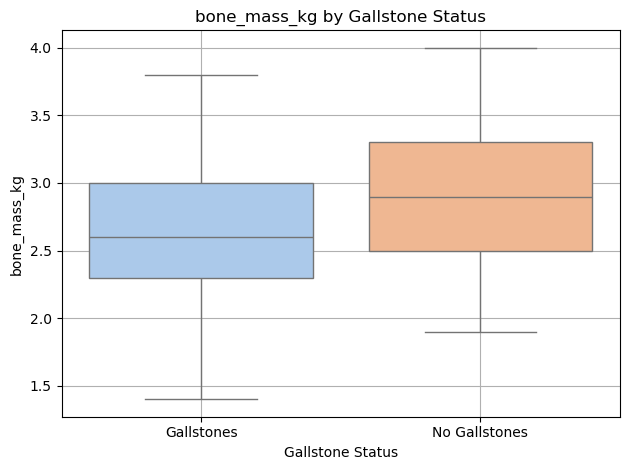

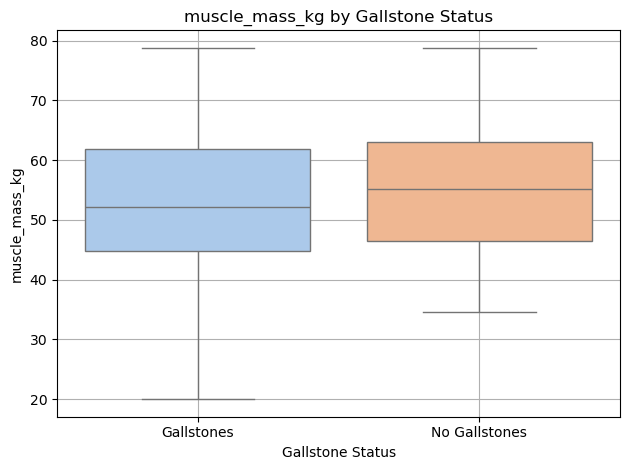

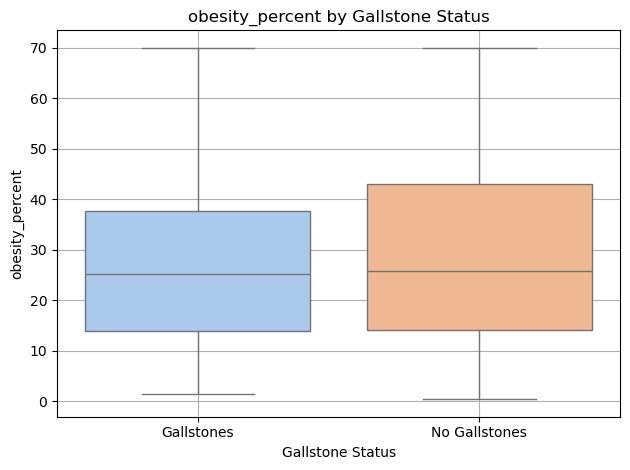

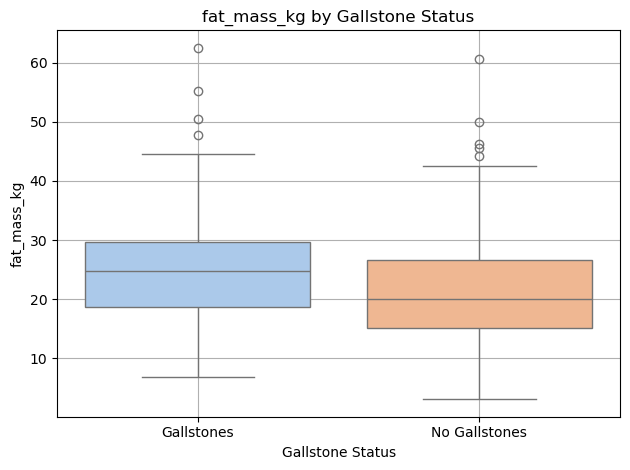

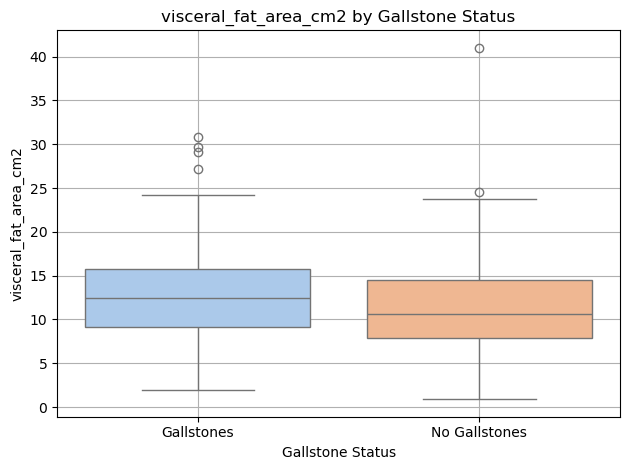

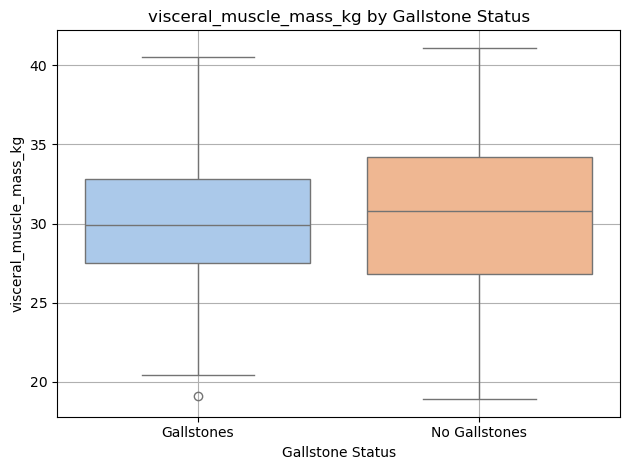

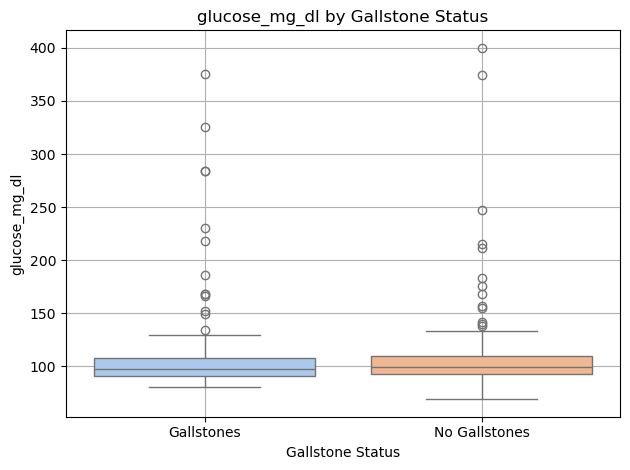

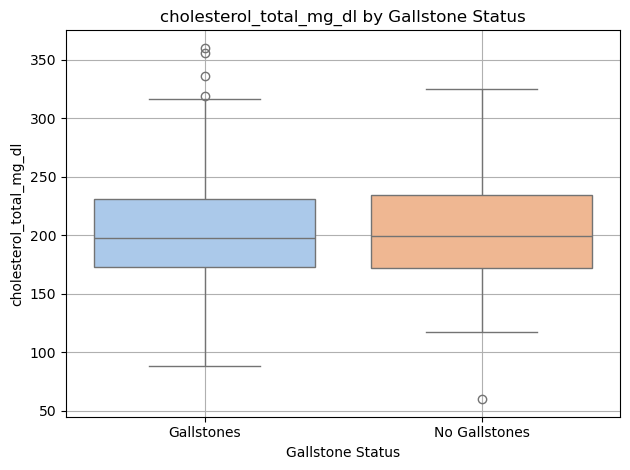

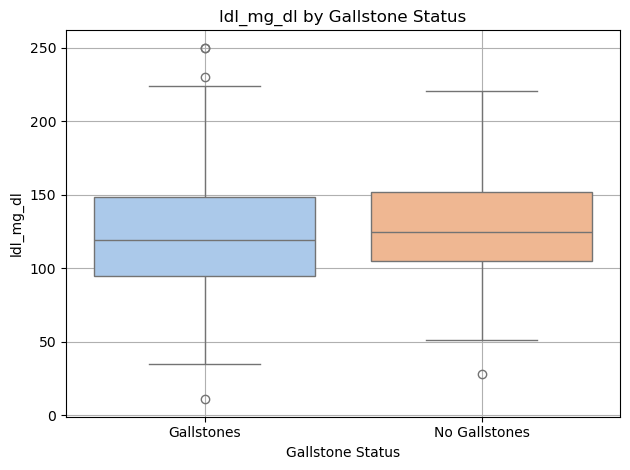

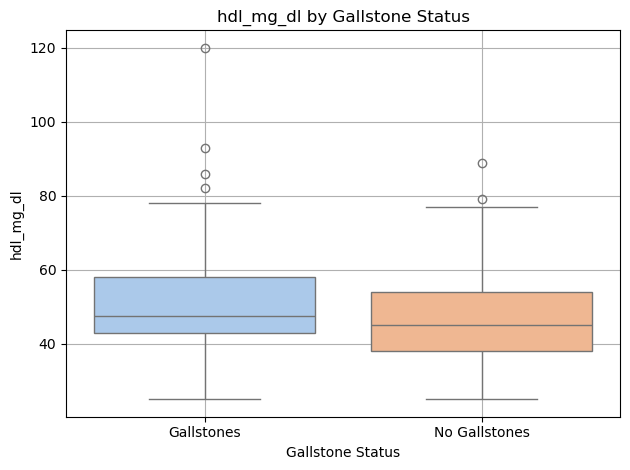

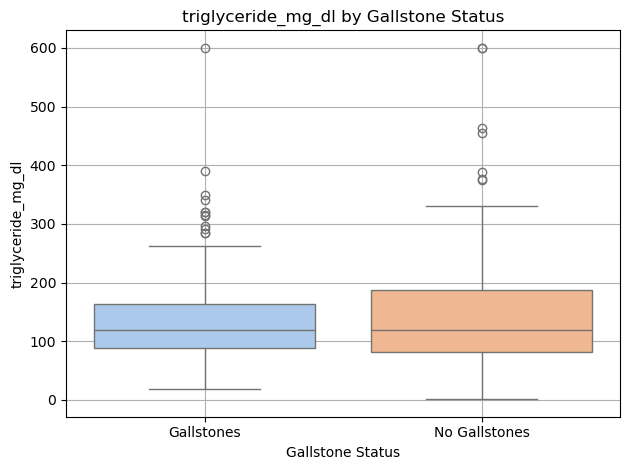

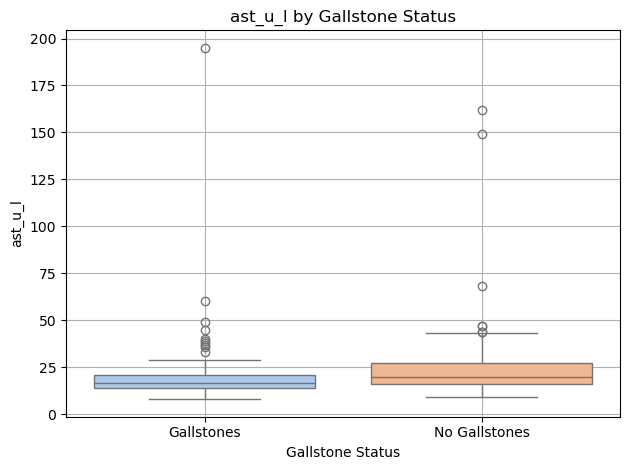

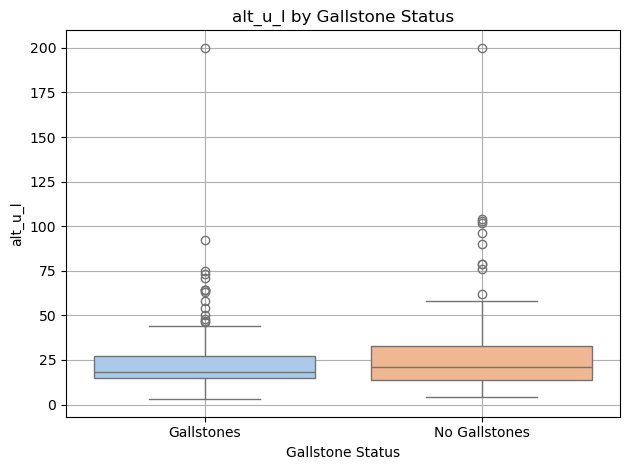

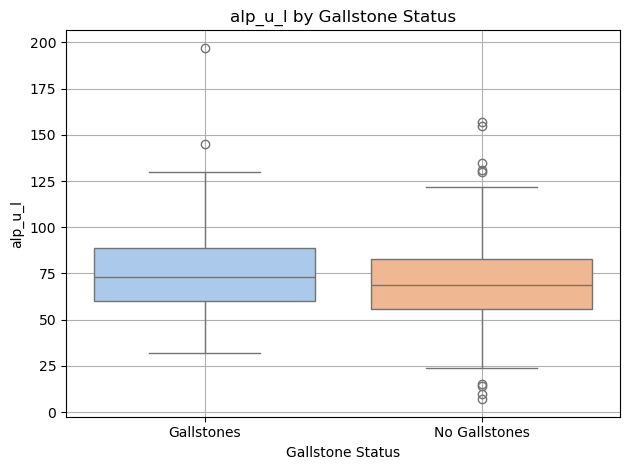

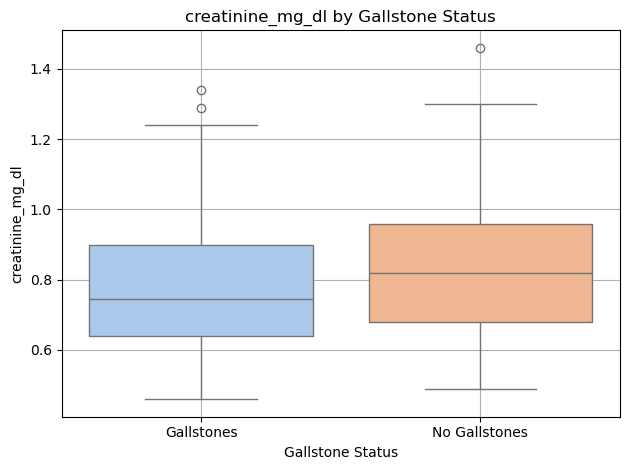

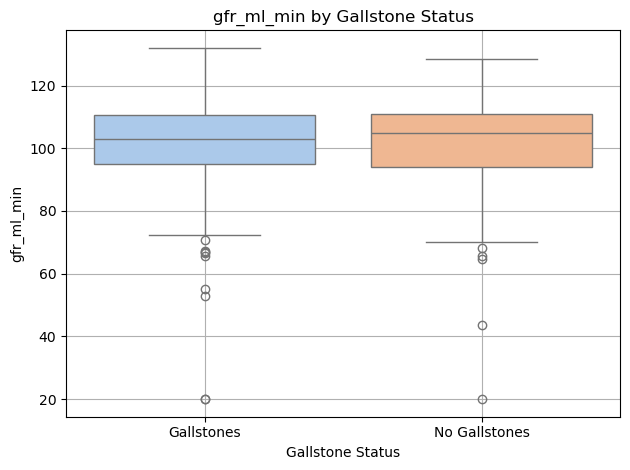

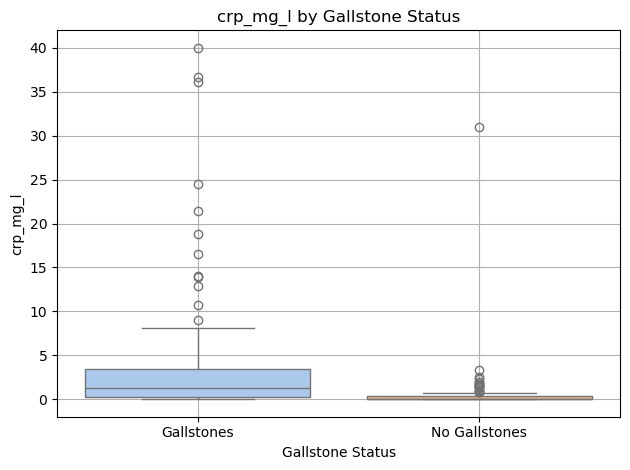

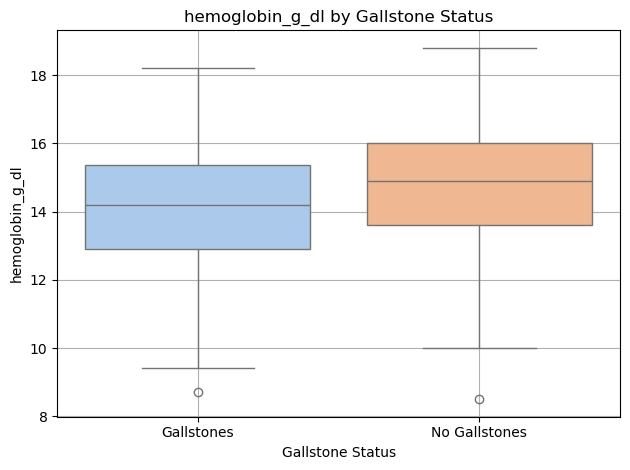

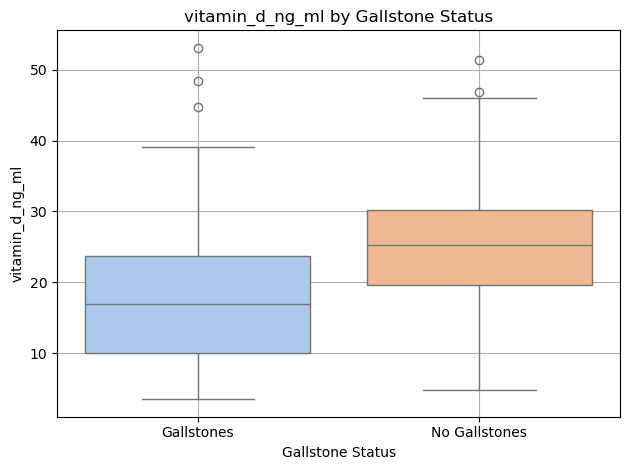

In [35]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the output folder exists
os.makedirs("../plots", exist_ok=True)

# Select all numeric features, excluding the target
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns
numeric_features = [col for col in numeric_features if col != "has_gallstones"]

# Generate and save boxplots
for feature in numeric_features:
    plt.figure()
    sns.boxplot(x="has_gallstones", y=feature, data=df, hue="has_gallstones", palette="pastel", legend=False)
    plt.title(f"{feature} by Gallstone Status")
    plt.xlabel("Gallstone Status")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()

    filename = f"../plots/boxplot_{feature}.png"
    plt.savefig(filename)
    plt.show()

## Feature-Target Relationship Analysis – Boxplots

We visualized the distribution of all numeric features by `has_gallstones` using boxplots. This step helps identify which features show meaningful differences between the two classes and informs both feature selection and explainability.

### Key Observations by Feature Category

#### 🔬 Laboratory & Metabolic Markers

| Feature               | Visual Pattern | Interpretation |
|------------------------|----------------|----------------|
| `vitamin_d_ng_ml`      | Lower in Gallstones group | Suggests deficiency-related risk |
| `hdl_mg_dl`            | Lower in Gallstones group | Matches known cardiometabolic trends |
| `crp_mg_l`             | Higher spread in Gallstones | Suggests inflammation may be a differentiator |
| `glucose_mg_dl`        | Slightly higher in No Gallstones | Counterintuitive; may reflect confounding |
| `triglyceride_mg_dl`   | Slightly higher in No Gallstones | May not be predictive in this cohort |
| `ldl_mg_dl`            | Slightly higher in No Gallstones | Overlap limits class separation |
| `cholesterol_total_mg_dl` | Similar across groups | Likely non-predictive |

#### 🧍 Body Composition Features

| Feature                  | Visual Pattern | Interpretation |
|---------------------------|----------------|----------------|
| `bmi`                     | Slightly higher in Gallstones | Supports known obesity risk |
| `fat_ratio_percent`       | Higher in Gallstones | Reinforces BMI trend |
| `fat_mass_kg`             | Slightly higher in Gallstones | Mildly supports adiposity link |
| `obesity_percent`         | Slightly higher in No Gallstones | Possibly noisy or device-influenced |
| `lean_mass_percent`       | Higher in No Gallstones | Inversely related to adiposity |
| `muscle_mass_kg`          | Higher in No Gallstones | Reflects lean body mass, not disease-specific |
| `visceral_fat_area_cm2`   | No clear difference | Overlapping distributions |
| `visceral_muscle_mass_kg` | Slightly higher in No Gallstones | Not directly predictive |
| `vfr_score`               | Similar medians | Device-derived, low separation |
| `protein_percent`         | Similar across classes | Not class-distinct |

#### 🧪 Organ Function Markers

| Feature         | Visual Pattern | Interpretation |
|------------------|----------------|----------------|
| `gfr_ml_min`      | Nearly identical | Not class-separating |
| `creatinine_mg_dl`| Slightly higher in No Gallstones | Very mild trend |
| `alp_u_l`, `alt_u_l`, `ast_u_l` | Similar with broad spread | No reliable class difference |

#### 💧 Hydration & Water Composition

| Feature              | Visual Pattern | Interpretation |
|------------------------|----------------|----------------|
| `tbw_kg`, `ecw_kg`, `icw_kg`, `ecf_tbw_ratio_index` | High overlap | Not class-separating; normal body variation |

#### 👤 Demographic & Anthropometric

| Feature       | Visual Pattern | Interpretation |
|----------------|----------------|----------------|
| `height_cm`    | Slightly higher in No Gallstones | Likely non-predictive |
| `weight_kg`    | Similar across groups | No meaningful trend |
| `age`          | Slightly older in Gallstones | Aligns with known age-related risk |

---

### Summary of Insights

- **Most predictive features** based on visual separation include:
  - `vitamin_d_ng_ml`, `hdl_mg_dl`, `bmi`, and `fat_ratio_percent`
- **Moderately useful features**:
  - `crp_mg_l`, `fat_mass_kg`, `lean_mass_percent`, `age`
- **Non-informative or noisy features**:
  - Blood lipids like `ldl_mg_dl`, `cholesterol_total_mg_dl`, hydration metrics, and some liver enzymes

While most features show overlapping distributions, several show **modest but consistent separation**, especially in relation to body fat, vitamin D, and HDL. These will help guide initial feature selection and interpretation in the modeling phase.

## Explore Correlations Between Numeric Features

To understand feature interrelationships, we compute and visualize pairwise Pearson correlations between all numeric features. This helps identify:

- Strongly correlated predictors that may be redundant
- Feature groupings based on body composition, labs, or derived indices
- Potential issues with multicollinearity that can affect certain models

Features with strong positive or negative correlations may require consolidation or dimensionality reduction (e.g., PCA, dropping one of the pair).

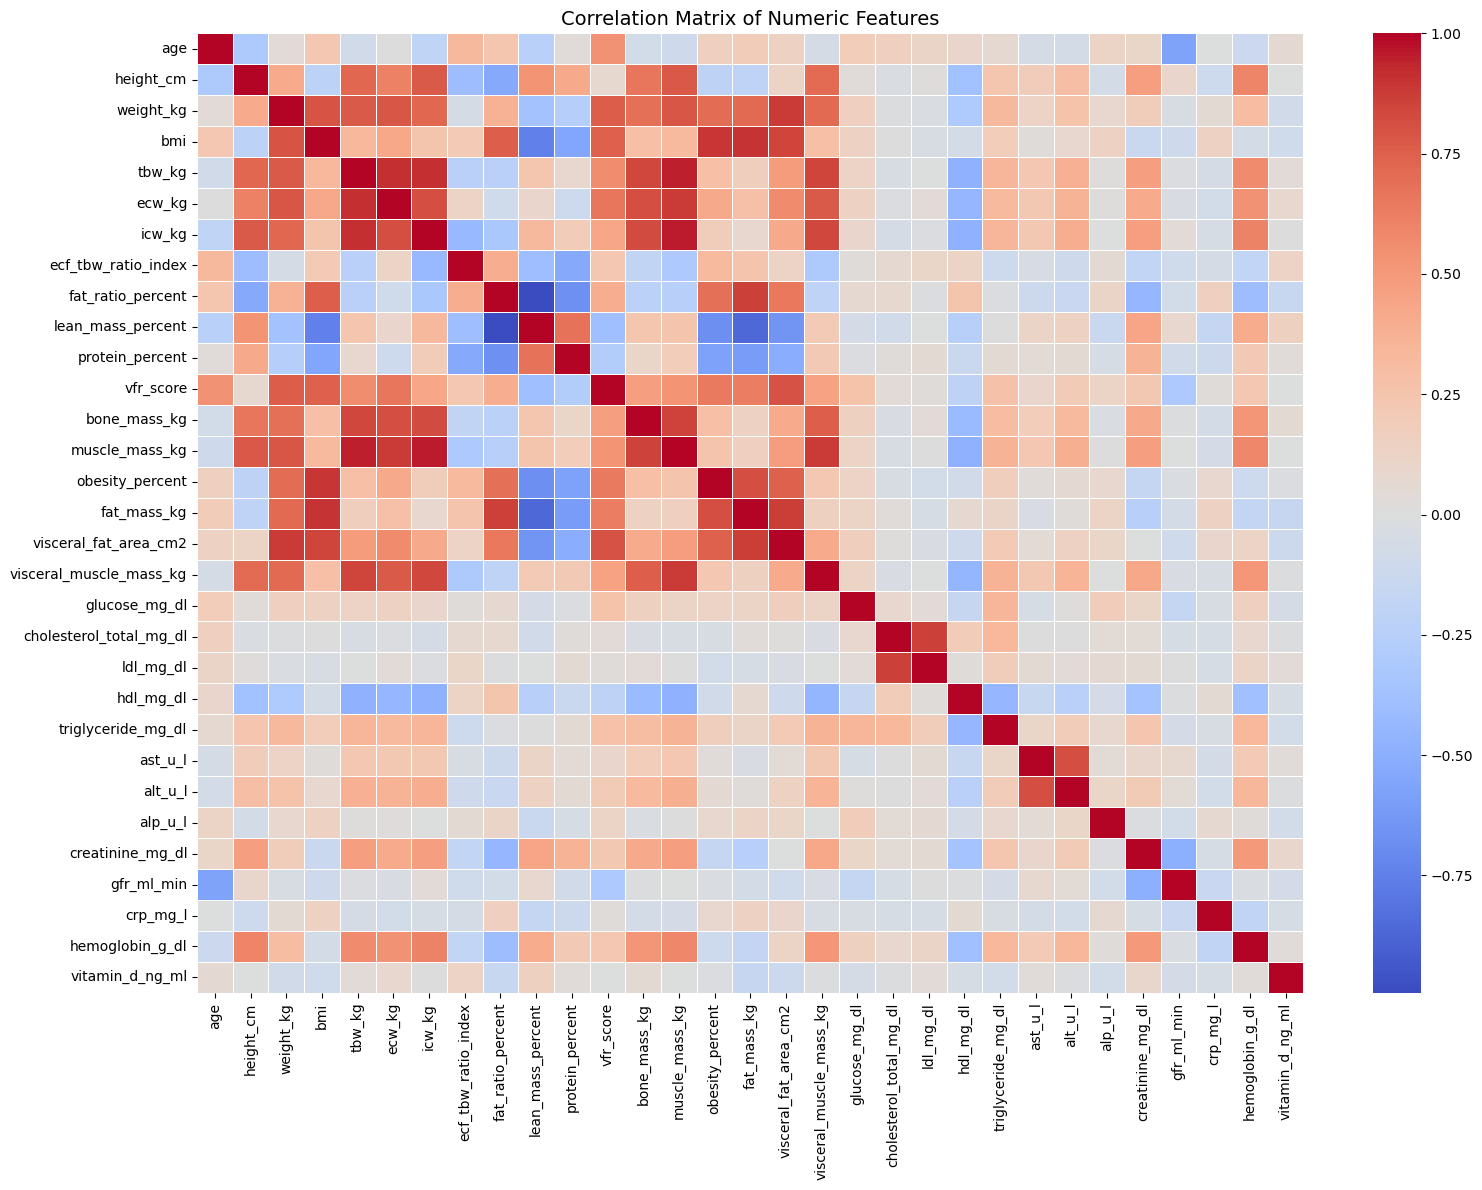

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (excluding the target)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols = [col for col in numeric_cols if col != "has_gallstones"]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.tight_layout()
plt.savefig("../plots/correlation_matrix.png")
plt.show()

In [40]:
import numpy as np

# Flatten and filter correlation matrix
high_corrs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corrs.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corrs = high_corrs[high_corrs["Correlation"].abs() > 0.85].sort_values(by="Correlation", ascending=False)
high_corrs

,Feature 1,Feature 2,Correlation
171,icw_kg,muscle_mass_kg,0.958030
122,tbw_kg,muscle_mass_kg,0.952455
114,tbw_kg,ecw_kg,0.913108
115,tbw_kg,icw_kg,0.911879
98,bmi,fat_mass_kg,0.902706
97,bmi,obesity_percent,0.891197
72,weight_kg,visceral_fat_area_cm2,0.881509
147,ecw_kg,muscle_mass_kg,0.879593
315,muscle_mass_kg,visceral_muscle_mass_kg,0.877829
345,fat_mass_kg,visceral_fat_area_cm2,0.873628


## Correlation Analysis of Numeric Features

We computed the Pearson correlation matrix for all numeric features to explore underlying relationships, assess multicollinearity risks, and support informed feature selection. The results are visualized in a correlation heatmap and further analyzed by identifying feature pairs with absolute correlation coefficients > 0.85.

### Key Findings from the Correlation Matrix

#### 🔁 Highly Correlated Feature Pairs (|r| > 0.85)

| Feature 1             | Feature 2                | Correlation | Interpretation |
|------------------------|--------------------------|-------------|----------------|
| `icw_kg`               | `muscle_mass_kg`         | 0.958       | Strong positive correlation; intracellular water is a direct component of muscle tissue mass |
| `tbw_kg`               | `muscle_mass_kg`         | 0.953       | Total body water reflects lean tissue mass; highly collinear with muscle mass |
| `tbw_kg`               | `ecw_kg`                 | 0.913       | ECW is a subcomponent of TBW, explaining this structural relationship |
| `tbw_kg`               | `icw_kg`                 | 0.912       | Reinforces redundancy among water-related features |
| `bmi`                 | `fat_mass_kg`            | 0.902       | BMI partially encodes body fatness; high collinearity with fat mass |
| `bmi`                 | `obesity_percent`        | 0.892       | Further supports BMI as a proxy for multiple adiposity markers |
| `weight_kg`           | `visceral_fat_area_cm2`  | 0.882       | Body weight tracks with visceral adiposity, though imperfectly |
| `ecw_kg`              | `muscle_mass_kg`         | 0.880       | Due to shared contribution from lean tissue hydration |
| `muscle_mass_kg`      | `visceral_muscle_mass_kg`| 0.878       | Suggests global and visceral muscle masses scale tightly |
| `fat_mass_kg`         | `visceral_fat_area_cm2`  | 0.873       | High shared variance, indicating feature redundancy |
| `fat_ratio_percent`   | `fat_mass_kg`            | 0.866       | Fat ratio is derived in part from fat mass; strong dependence |
| `cholesterol_total_mg_dl` | `ldl_mg_dl`          | 0.865       | LDL is a component of total cholesterol |
| `bone_mass_kg`        | `muscle_mass_kg`         | 0.853       | Bone and muscle mass increase together due to frame size and activity level |
| `fat_mass_kg`         | `lean_mass_percent`      | -0.848      | As fat increases, lean proportion decreases — consistent with physiological constraints |
| `fat_ratio_percent`   | `lean_mass_percent`      | -0.994      | Nearly perfect negative correlation; inverse ratio relationship |

---

### Implications for Modeling

- **Feature Redundancy:** Many features are biologically or structurally linked (e.g., TBW/ICW/ECW, muscle mass and water content). Including all in a model could lead to multicollinearity and overfitting — especially in linear models or models sensitive to correlated predictors.
  
- **Dimensionality Reduction Candidates:** Strongly correlated feature groups could benefit from:
  - Principal Component Analysis (PCA)
  - Domain-driven feature selection (e.g., keep only `muscle_mass_kg` from the muscle/water group)

- **Biological Validation:** The correlation structure is consistent with physiology and device-derived measurement logic. For instance:
  - Water and lean tissue variables track together
  - Fat ratio and lean ratio are nearly perfect inverses
  - BMI is central to both muscle and fat metrics

- **Model Robustness Considerations:** 
  - For **tree-based models**, high collinearity is less problematic due to feature splitting behavior.
  - For **linear models or logistic regression**, regularization or variance inflation factor (VIF) assessment may be necessary.

---

### Next Steps

- Consider **dropping or consolidating** features within highly correlated clusters.
- If interpretability is critical, favor **clinically interpretable representatives** (e.g., retain `bmi`, drop `obesity_percent`).
- For exploratory models, **retain all features** and evaluate downstream model coefficients or feature importances.

This correlation analysis provides foundational insight into the structure of the dataset and helps avoid redundancy, instability, or overfitting in future modeling pipelines.

## Save Key Plots to Plots Directory

To support reproducibility and effective communication, we save the most informative plots to the `plots/` directory.

These include:
- Histogram/KDE distributions of numeric features
- Boxplots comparing feature distributions across target classes
- Correlation matrix heatmap

These saved visuals can be embedded in stakeholder reports, README files, and model documentation.

In [41]:
import os

print("Files in /plots/:")
for file in sorted(os.listdir("../plots")):
    print(file)

Files in /plots/:
boxplot_age.png
boxplot_alp_u_l.png
boxplot_alt_u_l.png
boxplot_ast_u_l.png
boxplot_bmi.png
boxplot_bone_mass_kg.png
boxplot_cholesterol_total_mg_dl.png
boxplot_creatinine_mg_dl.png
boxplot_crp_mg_l.png
boxplot_ecf_tbw_ratio_index.png
boxplot_ecw_kg.png
boxplot_fat_mass_kg.png
boxplot_fat_ratio_percent.png
boxplot_gfr_ml_min.png
boxplot_glucose_mg_dl.png
boxplot_hdl_mg_dl.png
boxplot_height_cm.png
boxplot_hemoglobin_g_dl.png
boxplot_icw_kg.png
boxplot_ldl_mg_dl.png
boxplot_lean_mass_percent.png
boxplot_muscle_mass_kg.png
boxplot_obesity_percent.png
boxplot_protein_percent.png
boxplot_tbw_kg.png
boxplot_triglyceride_mg_dl.png
boxplot_vfr_score.png
boxplot_visceral_fat_area_cm2.png
boxplot_visceral_muscle_mass_kg.png
boxplot_vitamin_d_ng_ml.png
boxplot_weight_kg.png
correlation_matrix.png
hist_age.png
hist_alp_u_l.png
hist_alt_u_l.png
hist_ast_u_l.png
hist_bmi.png
hist_bone_mass_kg.png
hist_cholesterol_total_mg_dl.png
hist_creatinine_mg_dl.png
hist_crp_mg_l.png
hist_ecf

In [42]:
import shutil

# Create summary folder
os.makedirs("../plots/summary", exist_ok=True)

# List of key plot filenames
final_plots = [
    "boxplot_bmi.png",
    "boxplot_fat_ratio_percent.png",
    "boxplot_hdl_mg_dl.png",
    "boxplot_vitamin_d_ng_ml.png",
    "boxplot_crp_mg_l.png",
    "correlation_matrix.png",
    "hist_bmi.png",
    "hist_hdl_mg_dl.png"
]

# Copy them into summary folder
for filename in final_plots:
    src = os.path.join("../plots", filename)
    dst = os.path.join("../plots/summary", filename)
    shutil.copyfile(src, dst)

## Interpret Key EDA Findings

The exploratory data analysis (EDA) helped identify important trends, validate data integrity, and guide initial feature selection. Below is a structured summary of the most impactful insights.

---

### 1. Target Distribution

- `has_gallstones` is nearly perfectly balanced (50.5% vs. 49.5%), allowing standard classification metrics without rebalancing.
- Class balance reduces the risk of bias and supports stable model training.

---

### 2. Feature Distributions

- Most numeric features follow **right-skewed** or **near-normal** distributions, especially body composition and lab values.
- Several features (e.g., `crp_mg_l`, `triglyceride_mg_dl`, `alt_u_l`, `ast_u_l`) have long tails and may benefit from **log transformation** or **robust modeling techniques**.

---

### 3. Class-Separating Features (Boxplots)

- **Strongest separation** between gallstone-positive and negative groups:
  - `vitamin_d_ng_ml` – lower in Gallstones
  - `hdl_mg_dl` – lower in Gallstones
  - `bmi`, `fat_ratio_percent` – higher in Gallstones
  - `crp_mg_l` – wider spread in Gallstones

- **Moderate signals**:
  - `lean_mass_percent`, `fat_mass_kg`, `age` – show mild but consistent differences
  - `glucose_mg_dl`, `obesity_percent` – noisy or possibly confounded

---

### 4. Feature Redundancy (Correlations)

- Very high correlations between:
  - `icw_kg`, `tbw_kg`, `muscle_mass_kg`
  - `fat_ratio_percent` and `lean_mass_percent` (inverse relationship)
  - `bmi` with `fat_mass_kg` and `obesity_percent`
- These groups suggest **redundancy**; models may benefit from dropping or consolidating these features to avoid multicollinearity.

---

### 5. Human-Centered Relevance

- Many of the strongest predictors are **easily explainable to clinicians** and aligned with known risk factors.
- This supports downstream interpretability and trust in model behavior.

---

### Summary

| Insight Area         | Summary |
|----------------------|---------|
| Data Quality         | No major missingness or leakage detected. Outliers handled and flagged transparently. |
| Feature Importance   | Vitamin D, HDL, BMI, CRP, and fat composition show strongest class association. |
| Collinearity         | Water/muscle mass and fat metrics are highly correlated; select representative features. |
| Distribution Shape   | Right skew is common; transformations may help for sensitive models. |
| Explainability       | Predictors align with known clinical risk markers, supporting trust in outputs. |

These findings will guide both model selection and stakeholder communication. The next step is to define baseline models and build a pipeline using the most relevant features.

## Read Chapter 2 – Storytelling with Data

### Choosing an Effective Visual

1. **Choose visuals based on the message.**  
   Use bar charts for comparisons, line charts for trends, and scatter plots for relationships. The visual should serve the analytical goal, not just display data.

2. **Simplify to clarify.**  
   Eliminate unnecessary elements like 3D effects, excess colors, and chartjunk. A clean visual makes the insight easier to see and understand.

3. **Use visual hierarchy intentionally.**  
   Guide the audience’s attention with layout, labeling, and emphasis. Prioritize the most important information and remove distractions.

These principles support clearer EDA visuals and more effective communication of modeling results.